In [15]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

Text(0.5, 1.0, 'Variatie mica')

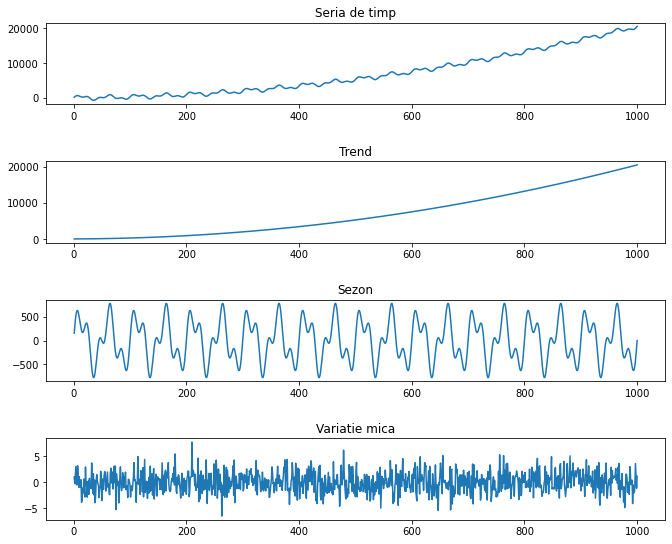

In [16]:
#a
np.random.seed(42)

N = 1000

time = np.arange(1, N + 1)

# Componenta de trend
trend = 0.02 * time ** 2 + 0.5 * time + 10

# Componenta sezonieră cu două frecvențe
seas1 = 500 * np.sin(2 * np.pi * time / 50)
seas2 = 300 * np.sin(2 * np.pi * time / 20)
seasonal = seas1 + seas2

# Componente variate folosind zgomot alb gaussian
noise = np.random.normal(0, 2, N)

time_series = trend + seasonal + noise

fig, axs = plt.subplots(4)
axs[0].plot(time, time_series)
axs[1].plot(time, trend)
axs[2].plot(time, seasonal)
axs[3].plot(time, noise)

plt.tight_layout()

fig.set_figheight(8)
fig.set_figwidth(10)

axs[0].set_title('Seria de timp')
axs[1].set_title('Trend')
axs[2].set_title('Sezon')
axs[3].set_title('Variatie mica')



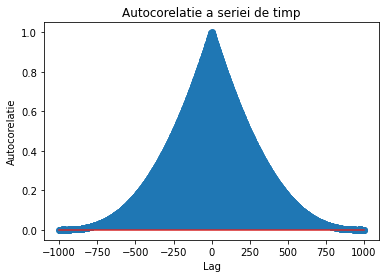

In [17]:
#b

# Vectorul de autocorelație provine din ideea că valorile unei serii de timp pot fi legate între ele în funcție de trecut sau viitor. 
# Prin calcularea acestor coeficienți, putem identifica modele sau tipare în datele temporale. 
# Dacă, de exemplu, observăm o autocorelație mare la un anumit lag, acest lucru ar putea indica faptul că valorile la acel lag sunt importante pentru a înțelege serie de timp.

# Calcul autocorelatie intre time_series si ea insasi
autocorr = np.correlate(time_series, time_series, mode='full') / np.max(np.correlate(time_series, time_series, mode='full'))
# autocorelația calculată este împărțită la valoarea maximă a autocorelației. Acest lucru normalizează valorile la intervalul [-1, 1]

time = np.arange(-N + 1, N)
plt.stem(time, autocorr)
plt.title('Autocorelatie a seriei de timp')
plt.xlabel('Lag')
plt.ylabel('Autocorelatie')
plt.show()

# Calcul autocorelatie intre cele 3 componenete ale time_series


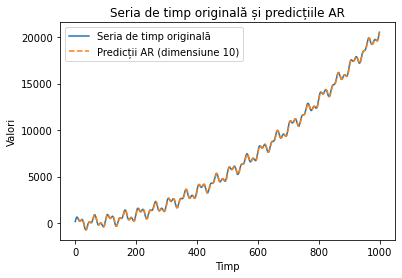

In [28]:
#c

p = 10
time = np.arange(1, N + 1)

# Construirea modelului AR
model = AutoReg(time_series, lags=p)
fit_model = model.fit()

# Realizarea predicțiilor cu modelul AR
predictions = fit_model.predict(start=p, end=N-1)

# Afișarea seriei de timp originală și predicțiilor AR
plt.plot(time, time_series, label='Seria de timp originală')
plt.plot(time[p:], predictions, label=f'Predicții AR (dimensiune {p})', linestyle='dashed')
plt.legend()
plt.title('Seria de timp originală și predicțiile AR')
plt.xlabel('Timp')
plt.ylabel('Valori')
plt.show()